# HIERACHICAL CLUSTERING

Underlying this clusetring we find the following logic:
A matrix of the distances between the points (the rows of the dataset), this uses a set distance, commonly the Euclidean distance. The goal is to achieve total clustering between all points, keeping track of the sequence of joins made during the algorithm. In fact, at each step clusters are created with the closest points, then these clusters are joined to others, and so on.
The difference between the types of hierarchical clustering lies in the logic with which we join two clusters, thus in the distance we take into account to choose the closest clusters to join in the step.

## CYCLIST DATASET
For every clustering we will show the result throught a dendongram (which represents how far are the last clusters merged) and a cartesian plane with three lines that will be clarified later.

In [5]:
import pandas as pd

from os import path
datasetname=path.join('..','dataset', 'cyclists_final_enhanced.csv')
df=pd.read_csv(datasetname)
df.head()

,_url,name,birth_year,weight,height,nationality,bmi,career_points,career_duration(days),career_duration(races),debut_year,avg_pos
0,bruno-surra,Bruno Surra,1964,73.0,185,Italy,21.329438,80.0,1.0,1.0,1989.0,110.000000
1,gerard-rue,Gérard Rué,1965,74.0,182,France,22.340297,26105.0,3493.0,222.0,1988.0,63.545045
2,jan-maas,Jan Maas,1996,69.0,189,Netherlands,19.316369,4425.0,519.0,49.0,2022.0,87.693878
3,nathan-van-hooydonck,Nathan Van Nathan Van Hooydonck,1995,78.0,192,Belgium,21.158854,17205.0,1982.0,161.0,2018.0,83.242236
4,jose-felix-parra,José Félix Parra,1997,55.0,171,Spain,18.809206,3085.0,721.0,48.0,2021.0,68.000000


Select only the columns with numerical values and normalize the dataset.

In [6]:
from sklearn.preprocessing import StandardScaler

df=pd.DataFrame(df, columns=['birth_year','weight','height','bmi','career_points','career_duration(days)','career_duration(races)','debut_year','avg_pos'])
scaler = StandardScaler()
X = scaler.fit_transform(df)

### ALL FEATURE CLUSTERING

When we go to perform clustering considering all the features we can try the different methodologies, to get an idea of which one shows sharper clustering with fewer cuts.

The joining criteria are:


-single: minimum distance between clustering points

-complete: maximum distance between clustering points

-average: average distance between points 

-ward: method based on whether the quadratic error increases as the clusters are joined

In the X axis we can find the number of minimum number of clusters at the end of the algorithm. In the Y axis we can find the trend of the three scores that we choose to evaluate the clustering. 
The Silhouette Score is one of the most common metrics for evaluating the quality of clustering and measures how well each point is assigned to its cluster relative to neighboring clusters. The SSE measures the sum of squares of the distances between each point and the centroid of the cluster it belongs to while the Mean Separation Score (MSS) measures the average separation between cluster centroids. 
To evaluate the graphs, it is enough to see when the mss and sse coincide, as the former should be maximized and the latter minimized keeping in mind that the silhouette score is the parameter to be given the most importance

#### Single

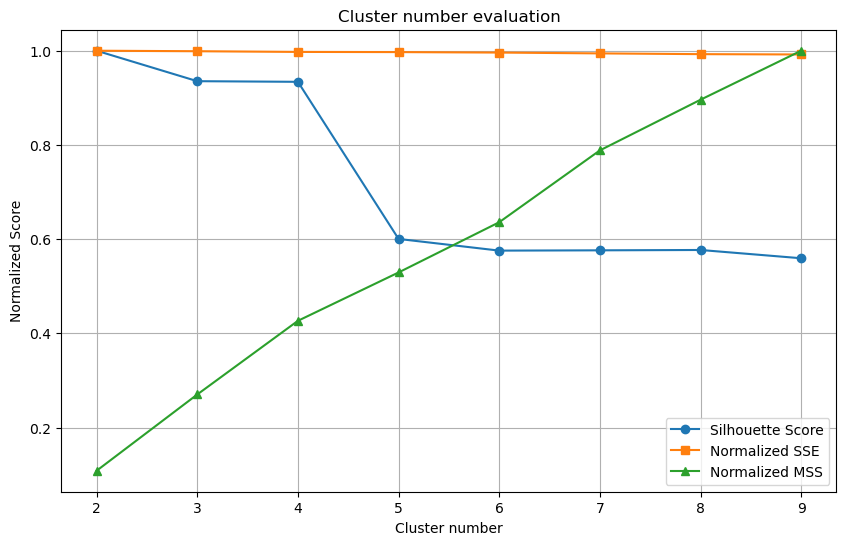

In [7]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

linkage_matrix = linkage(X, method='single')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))

    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS (separazione media tra i cluster)
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

In this case we find a distance not suitable for clustering. The mss rises with a high number of maximum clusters while the sse remains consistently high. The silhouette score, on the other hand, continues to decrease. This means that the chosen technique is not suitable for the dataset.

In [ ]:
results = pd.DataFrame({
    'Cluster_number': range_n_clusters,
    'Silhouette Score': silhouette_scores,
    'SSE (Normalized)': sse_scores,
    'MSS (Normalizzed)': mss_scores
})
results.sort_values("Silhouette Score", ascending=False)

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=20)  
plt.title("Dendrogram Single Linkage")
plt.ylabel("Distance")
plt.show()

NameError: name 'plt' is not defined

This result can also be seen in the dendogram where we find clusters very close to each other at every height except the last step.

#### Complete

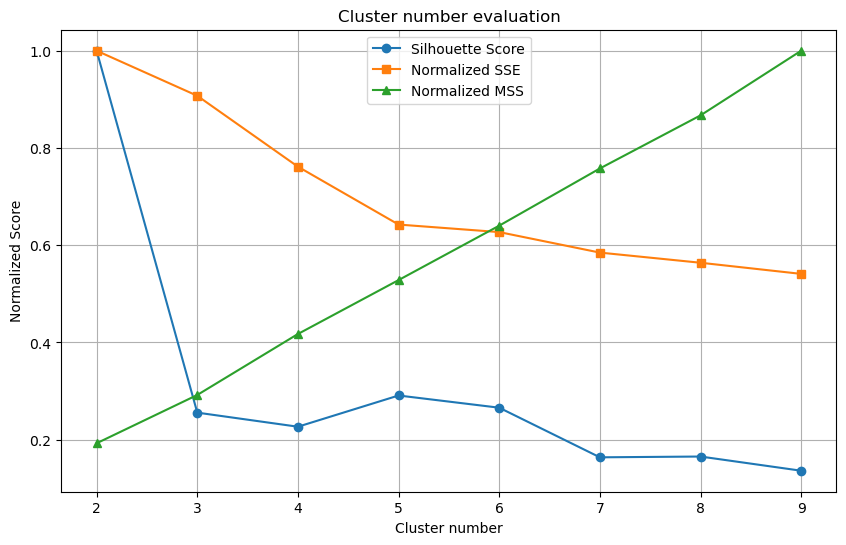

In [9]:
linkage_matrix = linkage(X, method='complete')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
results = pd.DataFrame({
    'Cluster_number': range_n_clusters,
    'Silhouette Score': silhouette_scores,
    'SSE (Normalized)': sse_scores,
    'MSS (Normalizzed)': mss_scores
})
results.sort_values("Silhouette Score", ascending=False)

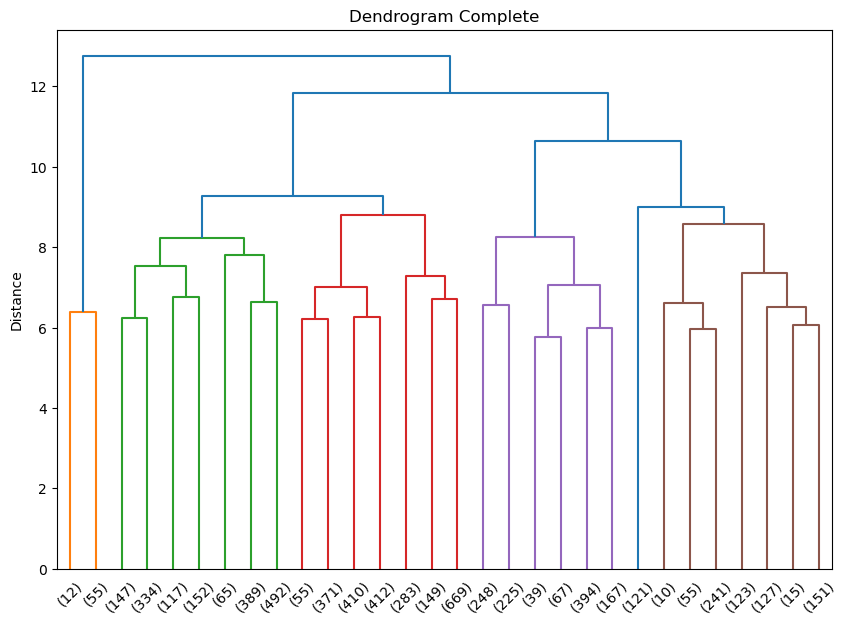

In [10]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Complete")
plt.ylabel("Distance")
plt.show()

The result can be higlithed in the dendogram too.

#### Average Clustering

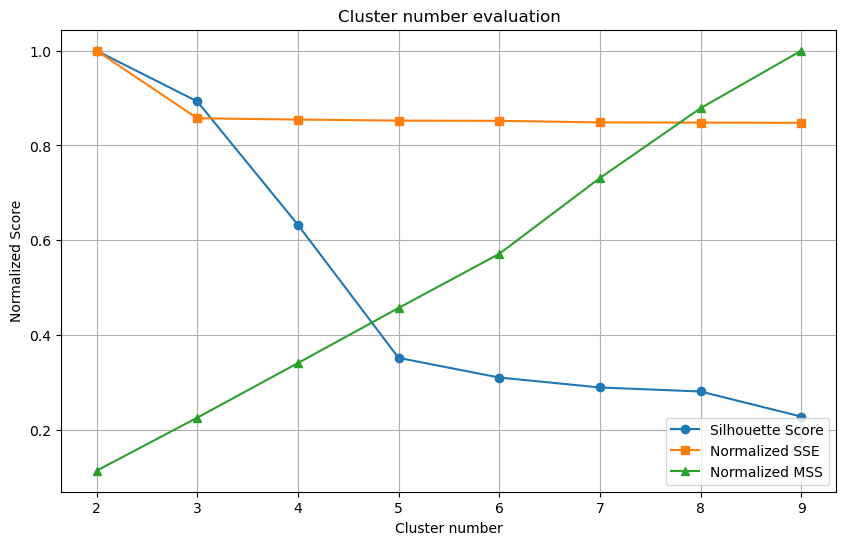

In [11]:
linkage_matrix = linkage(X, method='average')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

In this case the best number seems to be around 7 or 8 clusters, with a low silhouette score so this method too is not enough good.

In [2]:
results = pd.DataFrame({
    'Cluster_number': range_n_clusters,
    'Silhouette Score': silhouette_scores,
    'SSE (Normalized)': sse_scores,
    'MSS (Normalizzed)': mss_scores
})
results.sort_values("Silhouette Score", ascending=False)

NameError: name 'pd' is not defined

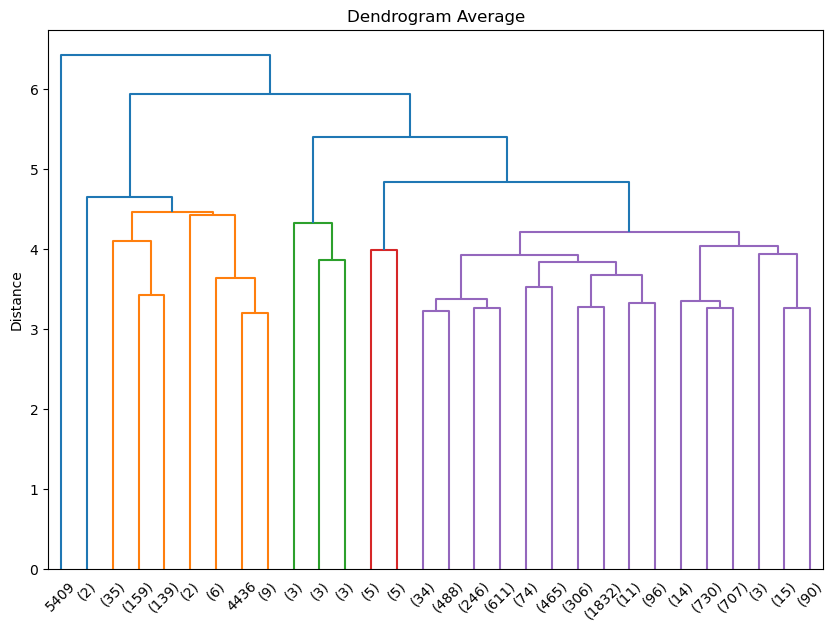

In [12]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Average")
plt.ylabel("Distance")
plt.show()

#### Ward's Method

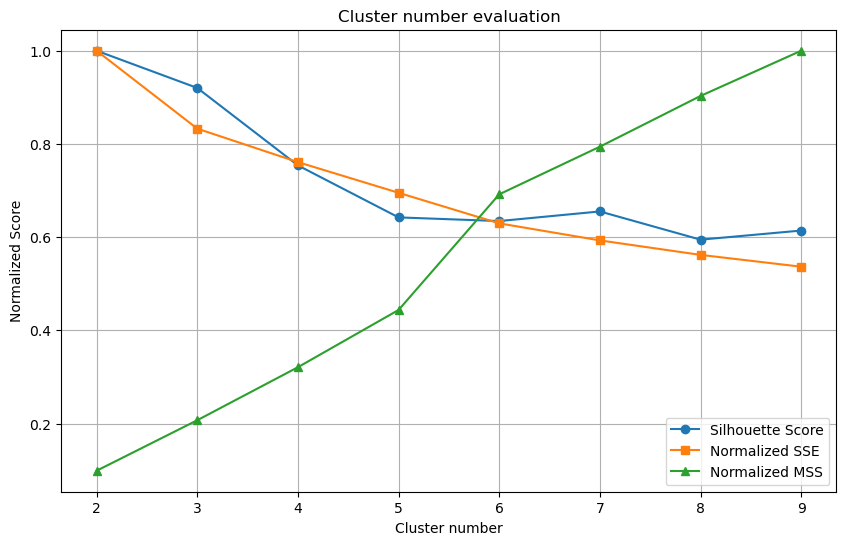

In [13]:
linkage_matrix = linkage(X, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

For the first time we can found a good silhouette score, (0.65) with 6 cluster so we can conclude that this is the best method for the hierarchical clustering.

In [ ]:
results = pd.DataFrame({
    'Cluster_number': range_n_clusters,
    'Silhouette Score': silhouette_scores,
    'SSE (Normalized)': sse_scores,
    'MSS (Normalizzed)': mss_scores
})
results.sort_values("Silhouette Score", ascending=False)

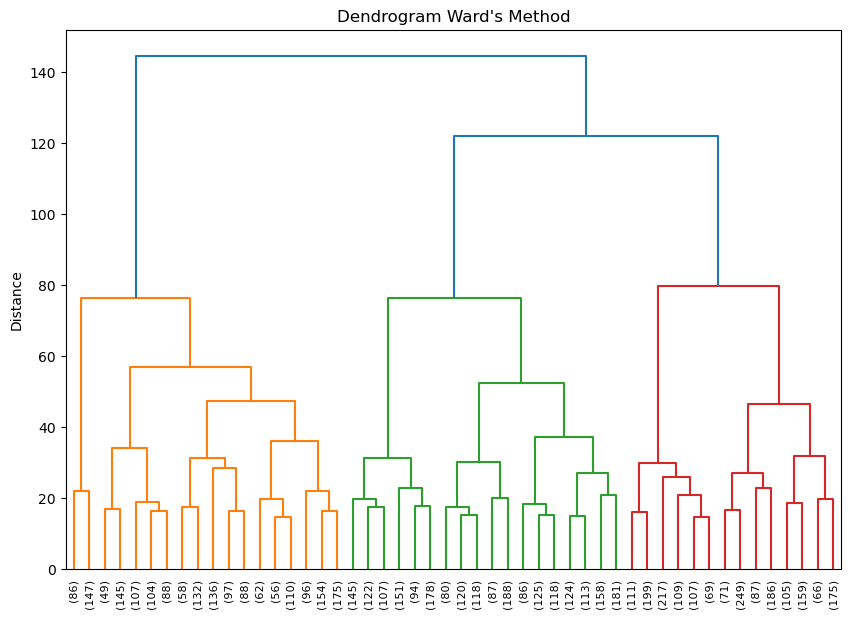

In [14]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=50)  
plt.title("Dendrogram Ward's Method")
plt.ylabel("Distance")
plt.show()

Da queste analisi possiamo notare che in media il Cluster number adatti per tutte le feature è 5-6, valutare solamente in base al silhouette potrebbe dare una stima errata in quanto considera la divisione tra i cluster e nel clustering gerarchico pochi cluster sono sinonimo di alta divisione.

### Aimed clustering
Per i clustering mirati a gruppi di feature specifici ci affidiamo al metodo di ward in quanto è quello più stabile per quanto riguarda la valutazione e in generale quello più affidabile

#### Caratteristiche fisiche (BMI, Peso, Altezza)

In [15]:
dfclust=pd.DataFrame(df, columns=['weight','height','bmi'])
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

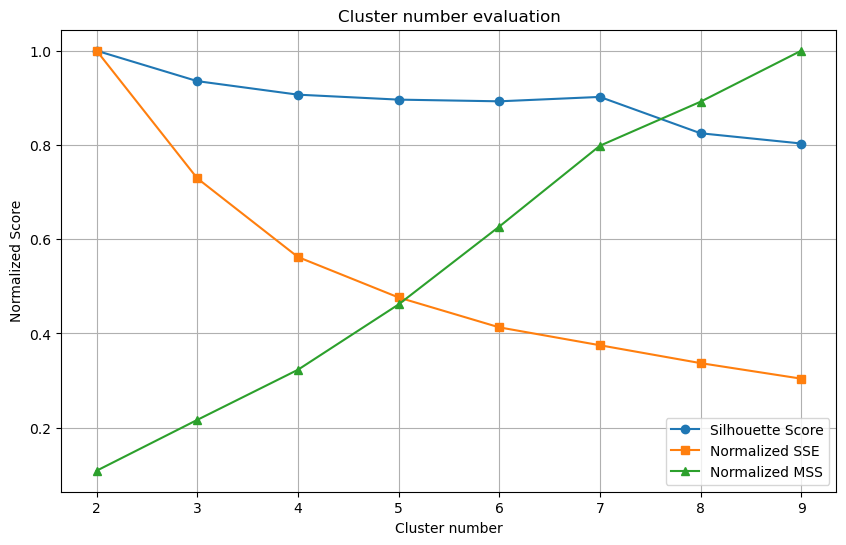

In [16]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

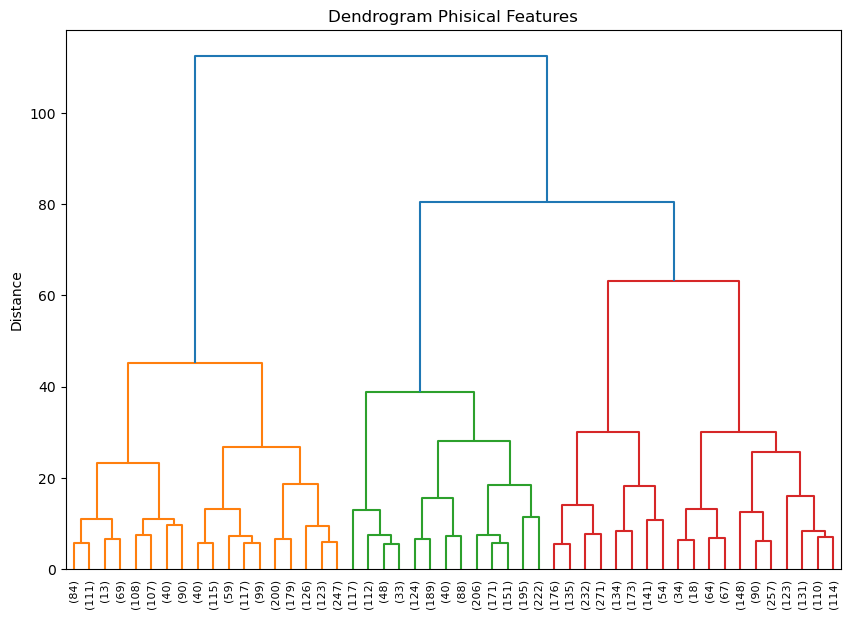

In [17]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=50)  
plt.title("Dendrogram Phisical Features")
plt.ylabel("Distance")
plt.show()

In [18]:
import plotly.express as px

data_3d = dfclust.values

linkage_matrix = linkage(Xclust, method='ward')
n_clusters = 5
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

fig = px.scatter_3d(
    df,
    x='weight',  
    y='height',  
    z='bmi',  
    color='cluster', 
    title='Cluster of physical features (Original Scale)',
    labels={'dim1': 'Dimension 1', 'dim2': 'Dimension 2', 'dim3': 'Dimension 3'},
    opacity=0.7  
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### Performances (avg_pos, career_points)

In [77]:
dfclust=pd.DataFrame(df, columns=['avg_pos','career_points'])
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

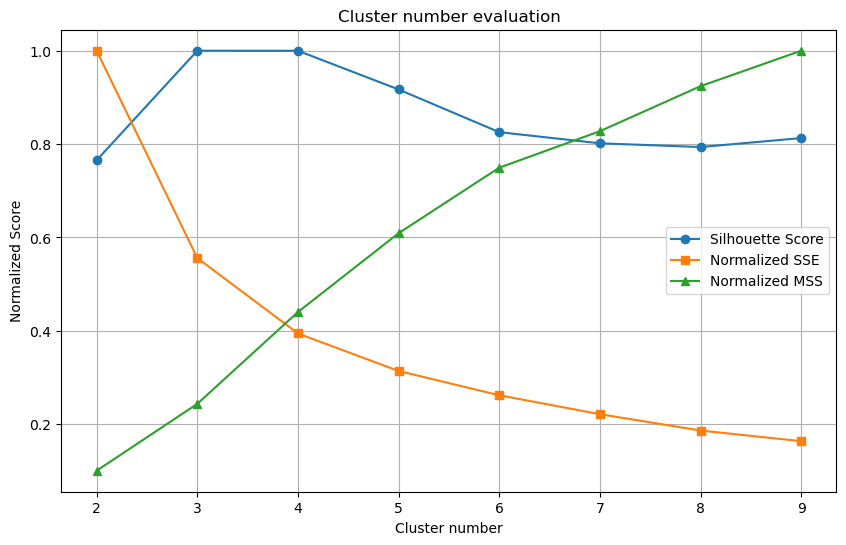

In [78]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

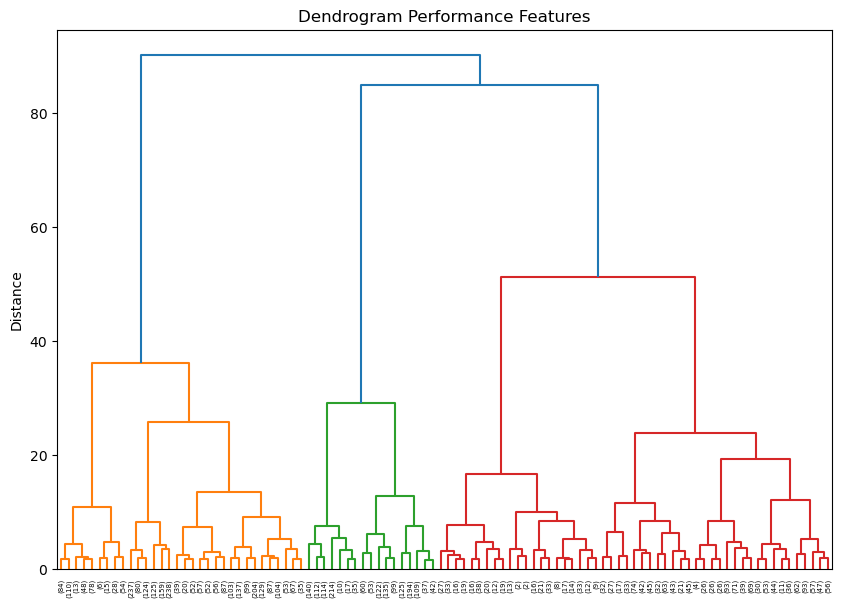

In [79]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=100)  
plt.title("Dendrogram Performance Features")
plt.ylabel("Distance")
plt.show()

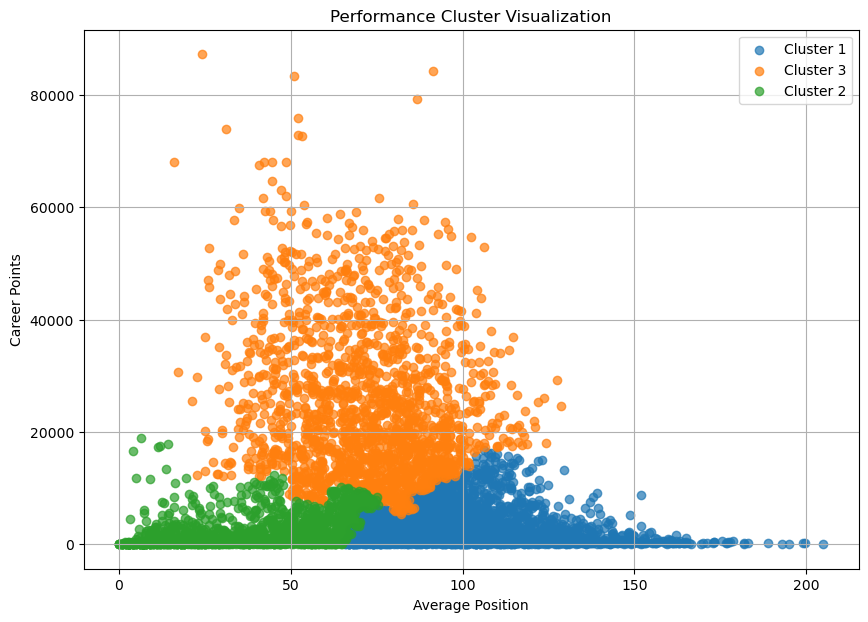

In [69]:
data_2d = dfclust.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2d)

linkage_matrix = linkage(scaled_data, method='ward')
n_clusters = 3
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

plt.figure(figsize=(10, 7))
for cluster_id in df['cluster'].unique():
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['avg_pos'], cluster_points['career_points'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Performance Cluster Visualization')
plt.xlabel('Average Position')
plt.ylabel('Career Points')
plt.legend()
plt.grid(True)
plt.show()

#### Valutazione Carriera (career_duration(races), career_points)

In [70]:
dfclust=pd.DataFrame(df, columns=['career_duration(races)','career_points'])

scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

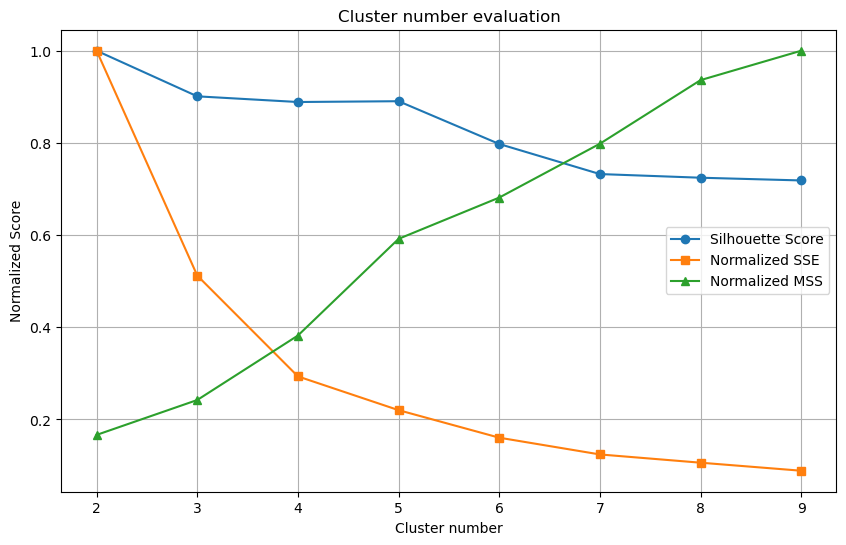

In [71]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

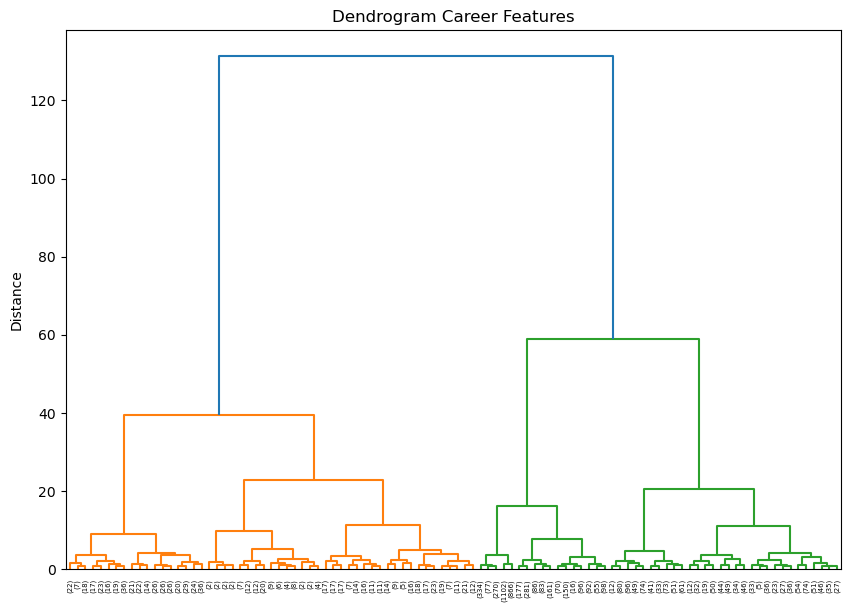

In [76]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=100)  
plt.title("Dendrogram Career Features")
plt.ylabel("Distance")
plt.show()

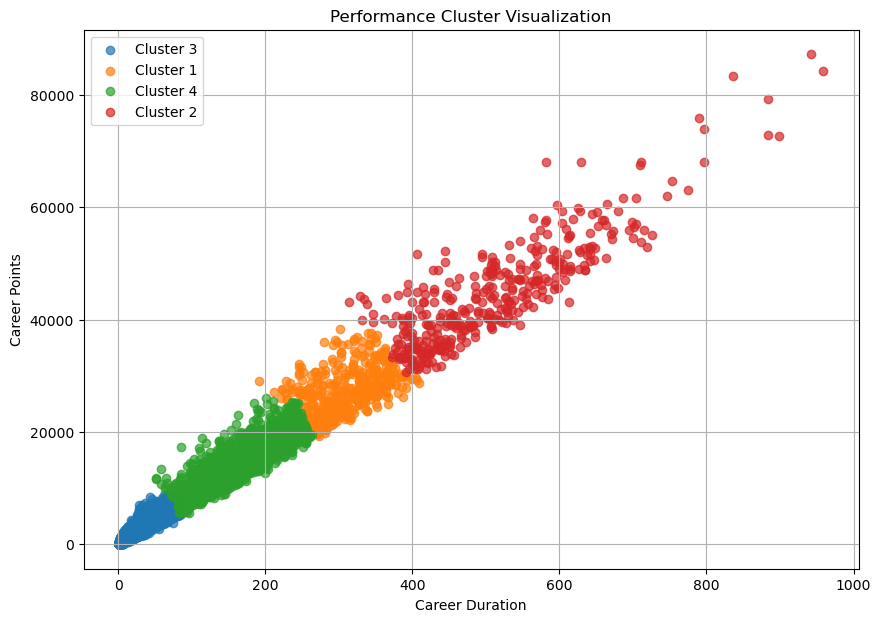

In [73]:
data_2d = dfclust.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2d)

linkage_matrix = linkage(scaled_data, method='ward')
n_clusters = 4
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

df['cluster'] = clusters

plt.figure(figsize=(10, 7))
for cluster_id in df['cluster'].unique():
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['career_duration(races)'], cluster_points['career_points'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Performance Cluster Visualization')
plt.xlabel('Career Duration')
plt.ylabel('Career Points')
plt.legend()
plt.grid(True)
plt.show()

## RACES DATASET

In [19]:
RACES_PATH=path.join("..","dataset","engineered_races.csv")
races_df=pd.read_csv(RACES_PATH)

num_columns = [
            'points',
            'length',
            'climb_total',
            'profile',
            'startlist_quality',
            'position',
            'cyclist_age',
            'delta',
            'climbing_efficiency',
            'competitive_age',
            'difficulty',
            'convenience_score',
            'difficulty_score',
            'performance_index',
            'gain_ratio',
 ]
data_df=races_df[num_columns].drop_duplicates()
data_df=races_df.groupby(['cyclist','std_name']).apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_5452\3094290586.py:22: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [20]:
print(f"the dataset has {data_df.shape[0]} samples with {data_df.shape[1]} features")
std_scaler=StandardScaler()
#the whole dataset is numeric
X=std_scaler.fit_transform(data_df[num_columns].drop_duplicates())

the dataset has 41449 samples with 22 features


### ALL FEATURE CLUSTERING




#### Single

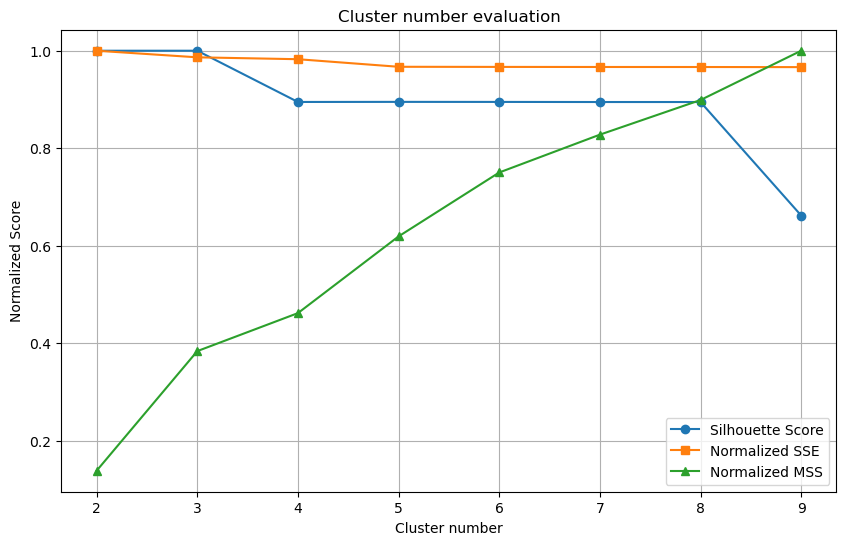

In [9]:
linkage_matrix = linkage(X, method='single')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))

    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS (separazione media tra i cluster)
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

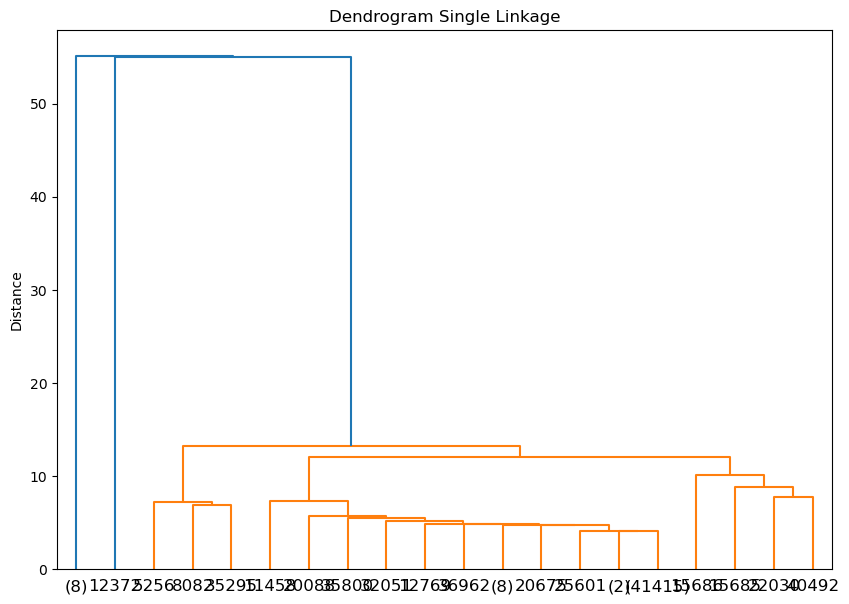

In [10]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=20)  
plt.title("Dendrogram Single Linkage")
plt.ylabel("Distance")
plt.show()

#### Complete

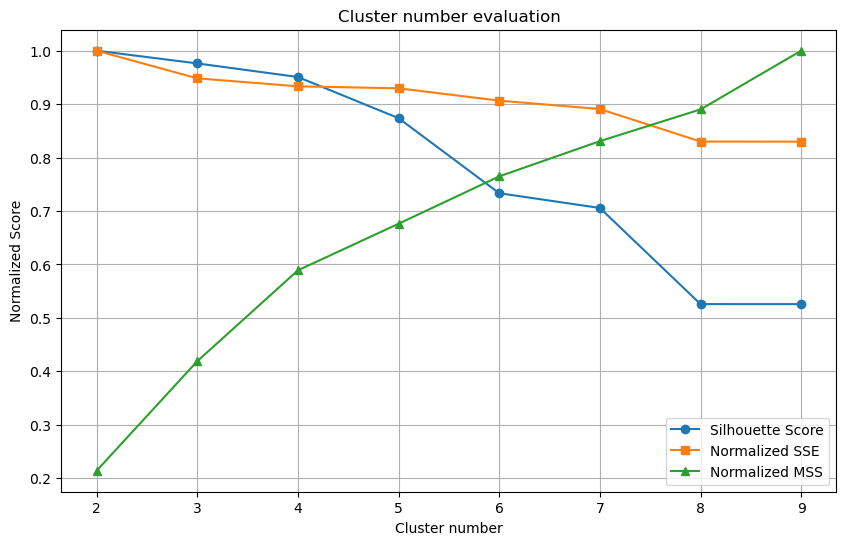

In [11]:
linkage_matrix = linkage(X, method='complete')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

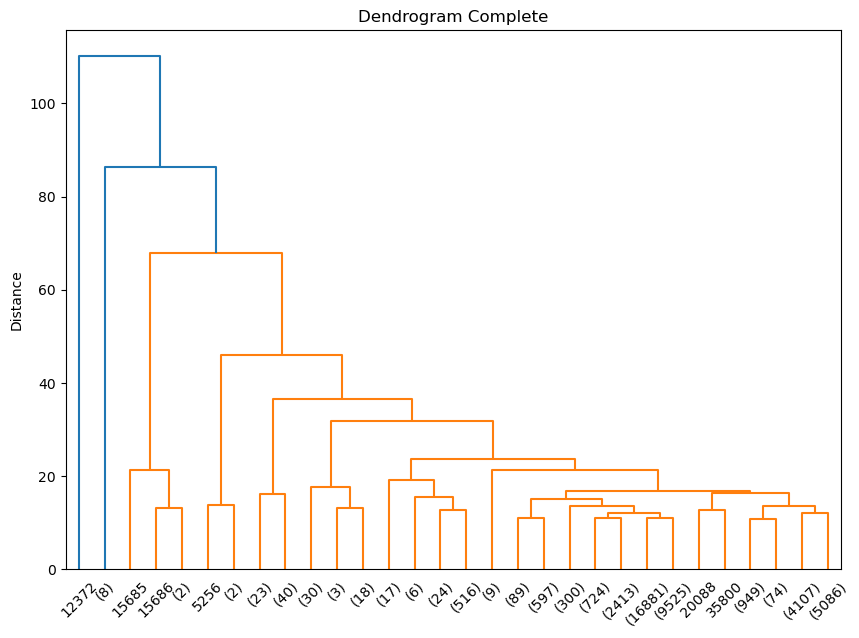

In [12]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Complete")
plt.ylabel("Distance")
plt.show()

#### Average Clustering

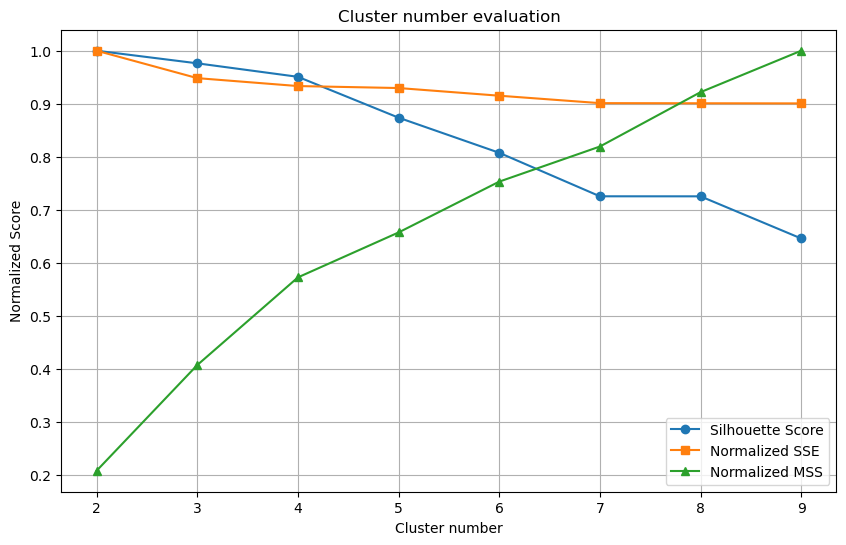

In [13]:
linkage_matrix = linkage(X, method='average')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

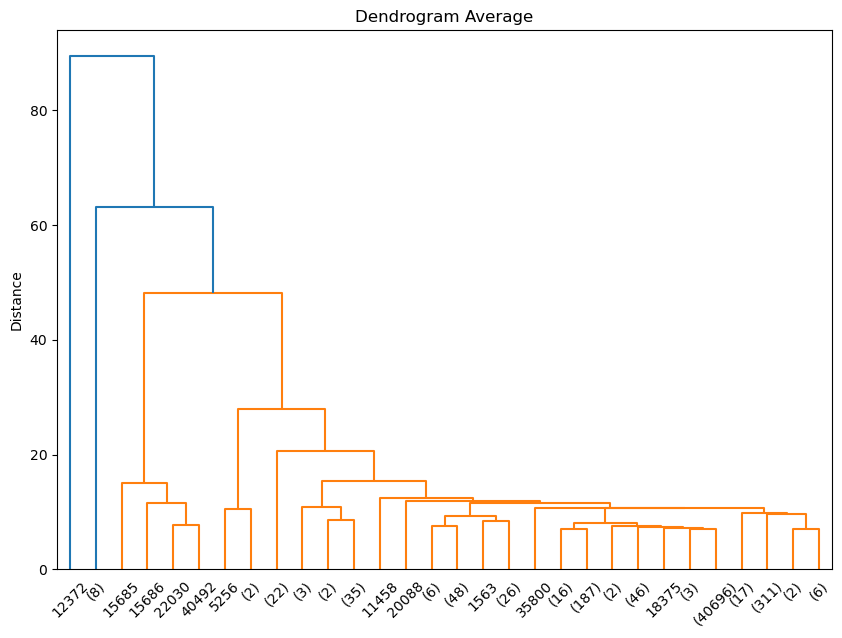

In [14]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Average")
plt.ylabel("Distance")
plt.show()

#### Ward's Method

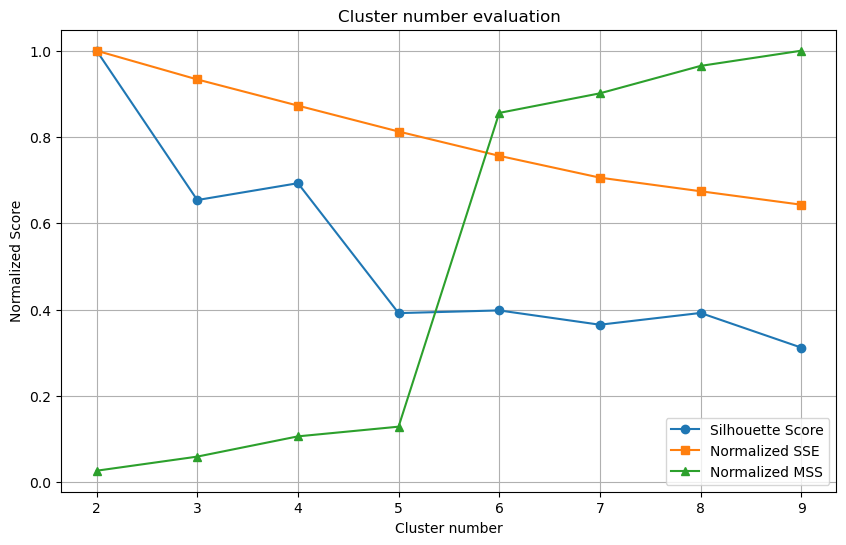

In [15]:
linkage_matrix = linkage(X, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(X, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([X[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

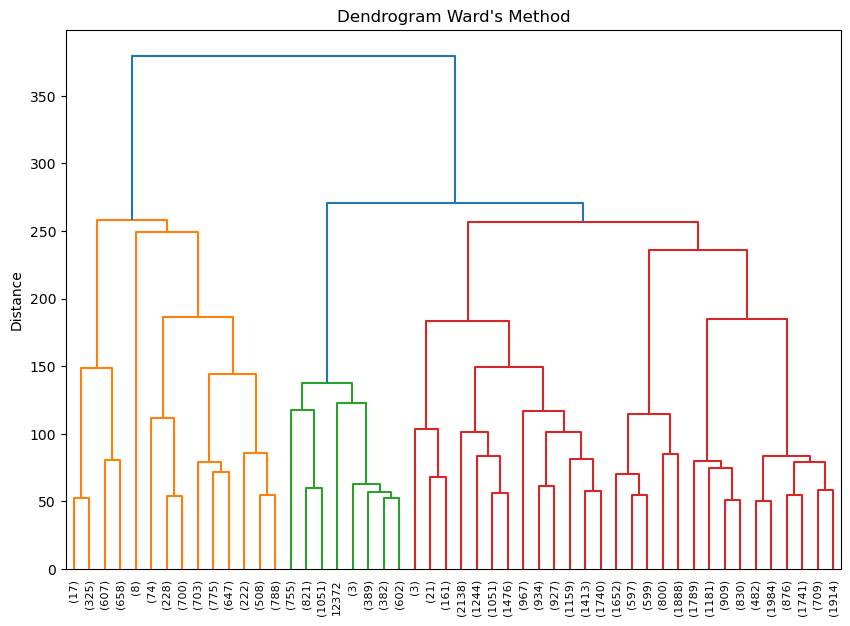

In [16]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=50)  
plt.title("Dendrogram Ward's Method")
plt.ylabel("Distance")
plt.show()

### SELECTED FEATURES CLUSTERING


In [21]:
print(data_df.columns)
morphologyfeatures=['length','climb_total','profile','climbing_efficiency','difficulty','difficulty_score','is_tarmac']
performancefeatures=['points','position','performance_index','delta']
conveniencefeatures=['startlist_quality','convenience_score','gain_ratio']


Index(['points', 'length', 'climb_total', 'profile', 'startlist_quality',
       'date', 'position', 'cyclist', 'cyclist_age', 'is_tarmac',
       'cyclist_team', 'delta', 'climbing_efficiency', 'competitive_age',
       'std_name', 'stage', 'difficulty', 'convenience_score',
       'difficulty_score', 'difficulty_level', 'performance_index',
       'gain_ratio'],
      dtype='object')


### Aimed clustering
Per i clustering mirati a gruppi di feature specifici ci affidiamo al metodo di ward in quanto è quello più stabile per quanto riguarda la valutazione e in generale quello più affidabile

#### Morphology features


In [22]:
dfclust=pd.DataFrame(data_df, columns=morphologyfeatures)
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

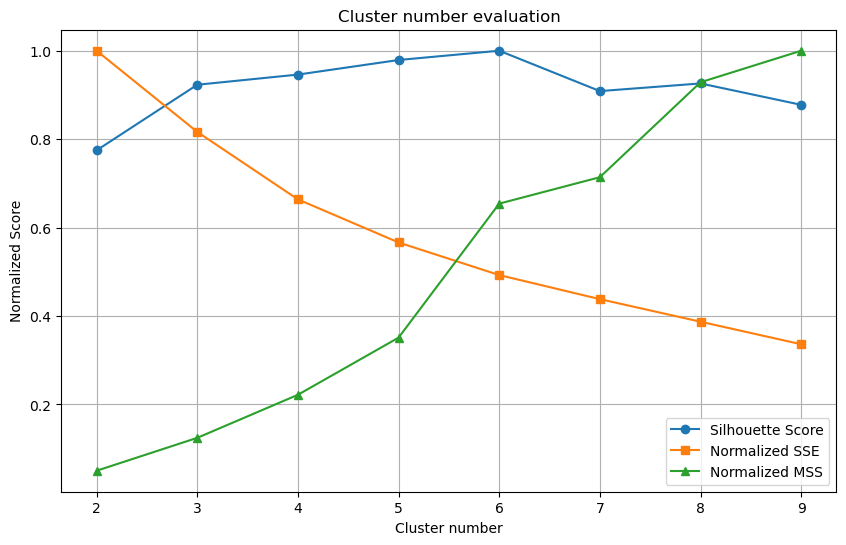

In [23]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

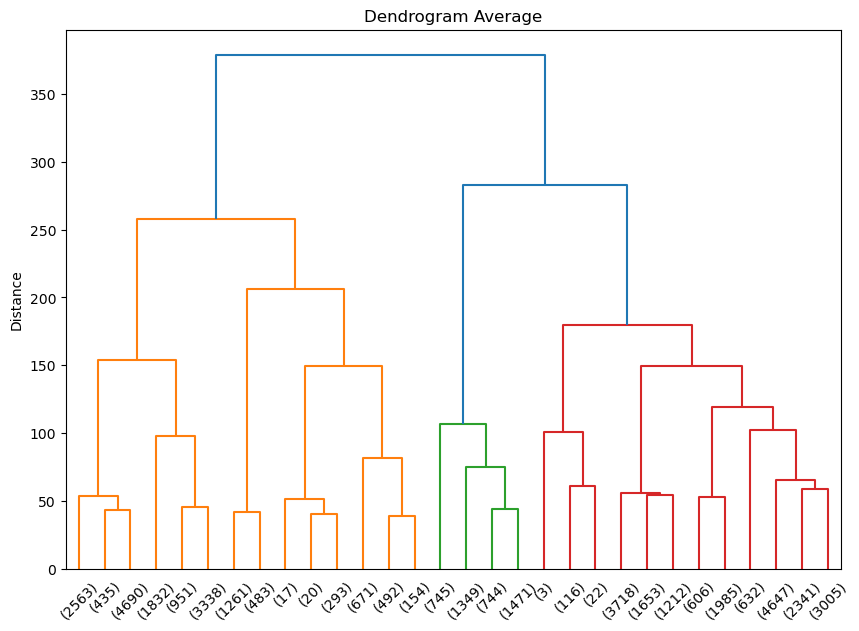

In [24]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Average")
plt.ylabel("Distance")
plt.show()

### PERFORMANCE FEATURES

In [25]:
dfclust=pd.DataFrame(data_df, columns=performancefeatures)
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

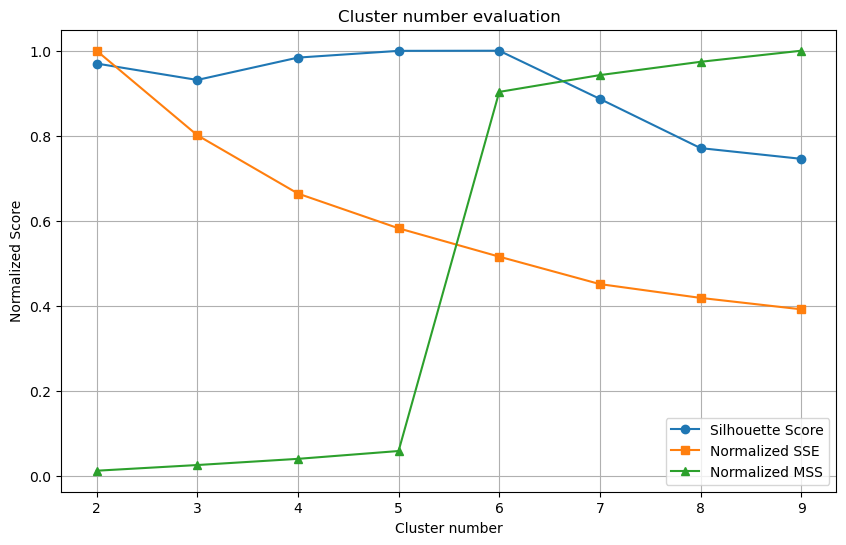

In [26]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

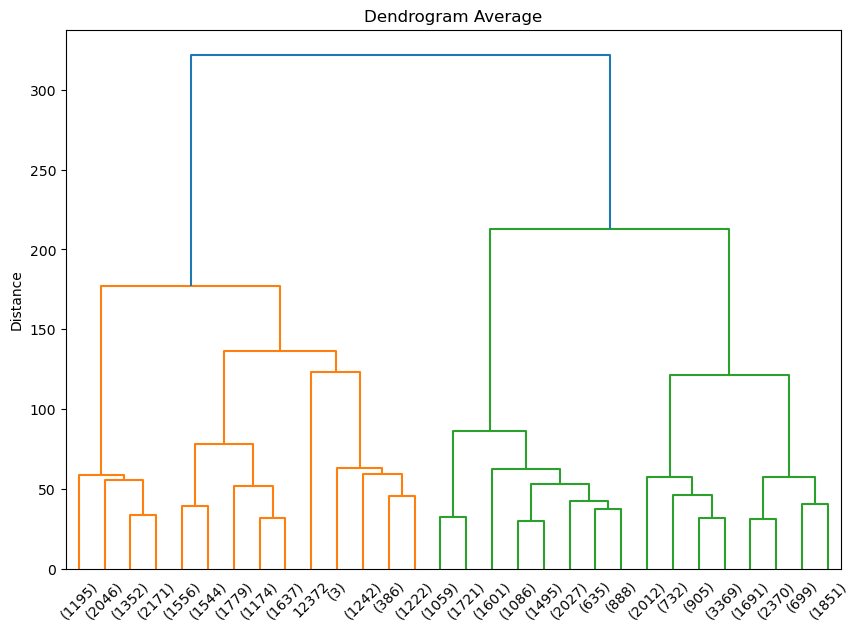

In [27]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Average")
plt.ylabel("Distance")
plt.show()

### CONVENIENCE FEATURES

In [28]:
dfclust=pd.DataFrame(data_df, columns=conveniencefeatures)
scaler = StandardScaler()
Xclust = scaler.fit_transform(dfclust)

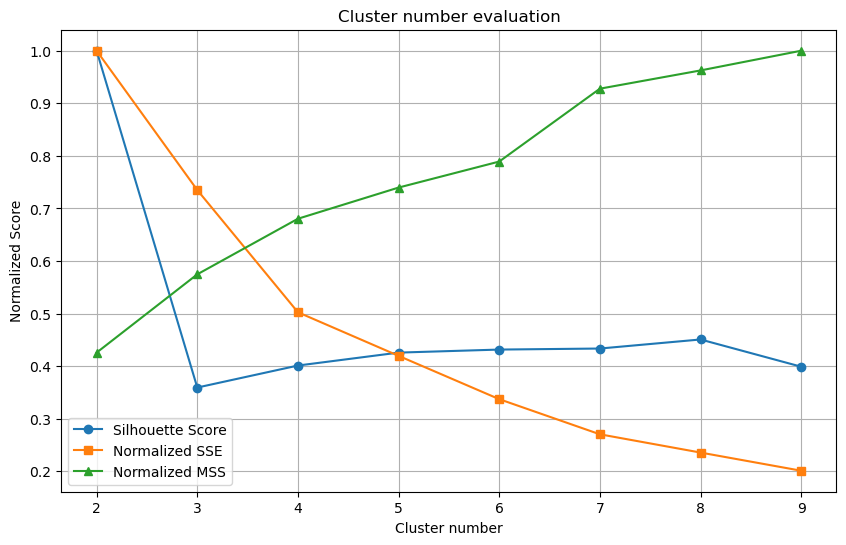

In [29]:
linkage_matrix = linkage(Xclust, method='ward')

range_n_clusters = range(2, 10)

silhouette_scores = []
sse_scores = []
mss_scores = []

for n_clusters in range_n_clusters:

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    silhouette_scores.append(silhouette_score(Xclust, clusters))
    # Calcolo SSE
    sse = 0
    for cluster_id in np.unique(clusters):
        cluster_points = Xclust[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    sse_scores.append(sse)

    # Calcolo MSS 
    cluster_centers = np.array([Xclust[clusters == cluster_id].mean(axis=0) for cluster_id in np.unique(clusters)])
    cluster_distances = np.sum([np.linalg.norm(cluster_centers[i] - cluster_centers[j]) for i in range(len(cluster_centers)) for j in range(i + 1, len(cluster_centers))])
    mss_scores.append(cluster_distances / len(cluster_centers))

sse_scores = np.array(sse_scores) / max(sse_scores)
mss_scores = np.array(mss_scores) / max(mss_scores)
silhouette_scores = np.array(silhouette_scores) / max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(range_n_clusters, sse_scores, label='Normalized SSE', marker='s')
plt.plot(range_n_clusters, mss_scores, label='Normalized MSS', marker='^')
plt.title("Cluster number evaluation")
plt.xlabel("Cluster number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid()
plt.show()

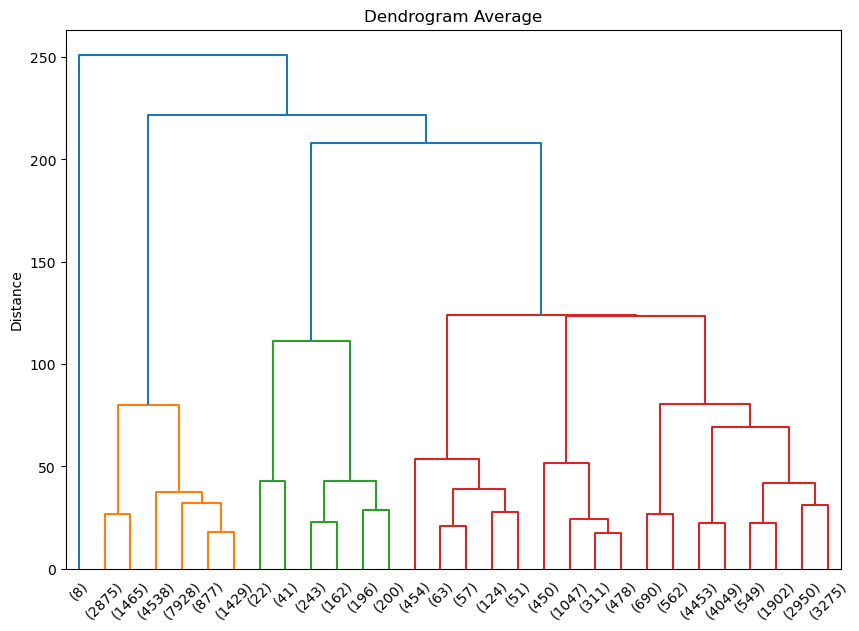

In [30]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)  
plt.title("Dendrogram Average")
plt.ylabel("Distance")
plt.show()